<a href="https://colab.research.google.com/github/aruna-1985/-usng-scipy-pi-value/blob/master/BigMartSalesLinear_Laso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [ ]:
import sklearn
sklearn.__version__

'0.22.2.post1'

In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()


Saving train_BigMartSales_Preprocessed.csv to train_BigMartSales_Preprocessed.csv


In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving test_BigMartSales_Preprocessed.csv to test_BigMartSales_Preprocessed.csv


In [ ]:
train = pd.read_csv("train_BigMartSales_Preprocessed.csv")
test = pd.read_csv("test_BigMartSales_Preprocessed.csv")

In [ ]:
train.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_2_DR,Item_Identifier_2_FD,Item_Identifier_2_NC,Outlet_Type_Category_Grocery,Outlet_Type_Category_Supermarket,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Identifier,Outlet_Identifier
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,9.30,0.016047,249.8092,3735.1380,21,FDA15,OUT049
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,5.92,0.019278,48.2692,443.4228,11,DRC01,OUT018
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,17.50,0.016760,141.6180,2097.2700,21,FDN15,OUT049
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,19.20,0.022930,182.0950,732.3800,22,FDX07,OUT010
4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,8.93,0.014670,53.8614,994.7052,33,NCD19,OUT013


In [ ]:
train_X = train.drop(columns= ["Item_Outlet_Sales","Item_Identifier", "Outlet_Identifier"])


In [ ]:
test_X = test.drop(columns= ["Item_Outlet_Sales","Item_Identifier", "Outlet_Identifier"])

In [ ]:
train_y = train["Item_Outlet_Sales"]

In [ ]:
len(test_X.columns)

37

In [ ]:
sample = pd.read_csv("https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_8RXa3c6.csv")
def run_model(model, train_X, train_y, test_X, sample, filename ):
     model.fit(train_X, train_y)
     pd.Series(model.coef_,index=test_X.columns).plot(kind = "bar")
     pred_train = model.predict(train_X)
     pred_test = model.predict(test_X)
     pred_test = abs(pred_test)
     print("RMSE of Train Data = ",np.sqrt(mean_squared_error(train_y, pred_train)))
     score = cross_val_score(model, train_X, train_y, cv = 10, scoring = "neg_root_mean_squared_error" )
     print("Cross validation Score = ",np.mean(np.abs(score)))
     sample["Item_Outlet_Sales"] = pred_test
     sample.to_csv(filename, index = False)

RMSE of Train Data =  1127.7579566206157
Cross validation Score =  1132.7719674034229


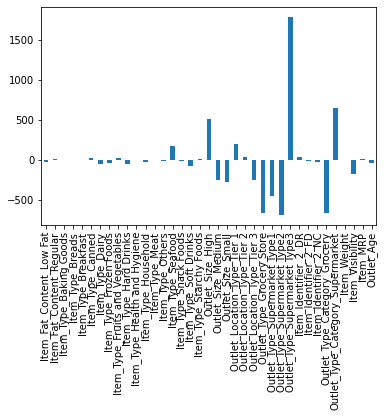

In [ ]:
model = LinearRegression()
run_model(model, train_X, train_y, test_X, sample, "test_result_Linear_regression.csv" )

RMSE of Train Data =  1128.9077893563092
Cross validation Score =  1133.4736105614832


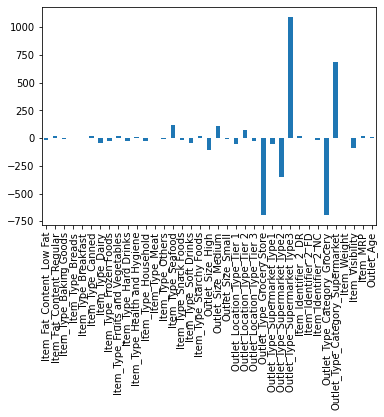

In [ ]:
model = Ridge(alpha = 30)
run_model(model, train_X, train_y, test_X, sample, "test_result_Ridge_regression.csv" )

RMSE of Train Data =  1140.2661956391537
Cross validation Score =  1141.0112631831093


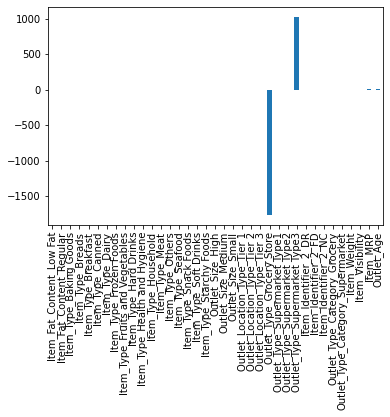

In [ ]:
model = Lasso(alpha=30)
run_model(model, train_X, train_y, test_X, sample, "test_result_Lasso_regression.csv" )

RMSE of Train Data =  1243.0058476638278
Cross validation Score =  1244.1817515212558


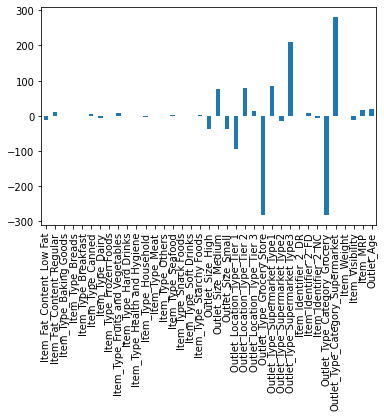

In [ ]:
model = ElasticNet(alpha=1, l1_ratio=0.5)
run_model(model, train_X, train_y, test_X, sample, "test_result_ElasticNet_regression.csv")